In [1]:
# %pip install langchain

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail19maybe_wrap_dim_slowEllb
  warn(f"Failed to load image Python extension: {e}")


In [2]:
class FeatureVector(object):
    def __init__(self):
        self.model = models.resnet18(pretrained=True)
        self.model.eval()
        self.layer = self.model._modules.get("avgpool")
        self.cos = nn.CosineSimilarity(dim=1, eps=1e-6)
        self.transform_pipeline = transforms.Compose([transforms.Resize((224, 224)),
                                                      transforms.ToTensor(),
                                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                                           std=[0.229, 0.224, 0.225])])
        
    def get_vector(self, img):
        t_img = Variable(self.transform_pipeline(img)).unsqueeze(0)
        feat_vec = torch.zeros(512)

        def copy_data(m, i, o):
            feat_vec.copy_(o.data.squeeze())

        h = self.layer.register_forward_hook(copy_data)
        self.model(t_img)
        h.remove()

        return feat_vec
    
    def similarity(self, a, b):
        return self.cos(a.unsqueeze(0), b.unsqueeze(0))

In [3]:
feat_vec = FeatureVector()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:03<00:00, 13.2MB/s]


In [4]:
import os
path = "./images/"
image_filepaths = [path + x for x in os.listdir(path)]
image_filepaths

['./images/cat1.jpg',
 './images/cat2.jpg',
 './images/chair.jpg',
 './images/dog1.jpg',
 './images/dog2.jpg',
 './images/dog3.jpg',
 './images/dog4.jpg',
 './images/dog5.jpg',
 './images/person1.jpg',
 './images/person2.jpg',
 './images/stones.jpg']

In [5]:
image_file_name_path_mapping = { x.split("/")[-1]: x for x in image_filepaths}
image_file_name_path_mapping

{'cat1.jpg': './images/cat1.jpg',
 'cat2.jpg': './images/cat2.jpg',
 'chair.jpg': './images/chair.jpg',
 'dog1.jpg': './images/dog1.jpg',
 'dog2.jpg': './images/dog2.jpg',
 'dog3.jpg': './images/dog3.jpg',
 'dog4.jpg': './images/dog4.jpg',
 'dog5.jpg': './images/dog5.jpg',
 'person1.jpg': './images/person1.jpg',
 'person2.jpg': './images/person2.jpg',
 'stones.jpg': './images/stones.jpg'}

In [6]:
image_mappings = {x.split("/")[-1]:Image.open(x) for x in image_filepaths}
image_mappings

{'cat1.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x400>,
 'cat2.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2800x1575>,
 'chair.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x748>,
 'dog1.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1100x825>,
 'dog2.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=645x380>,
 'dog3.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2000x1333>,
 'dog4.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x316>,
 'dog5.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2560x1600>,
 'person1.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720>,
 'person2.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1080>,
 'stones.jpg': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x698>}

In [7]:
image_mappings.keys()

dict_keys(['cat1.jpg', 'cat2.jpg', 'chair.jpg', 'dog1.jpg', 'dog2.jpg', 'dog3.jpg', 'dog4.jpg', 'dog5.jpg', 'person1.jpg', 'person2.jpg', 'stones.jpg'])

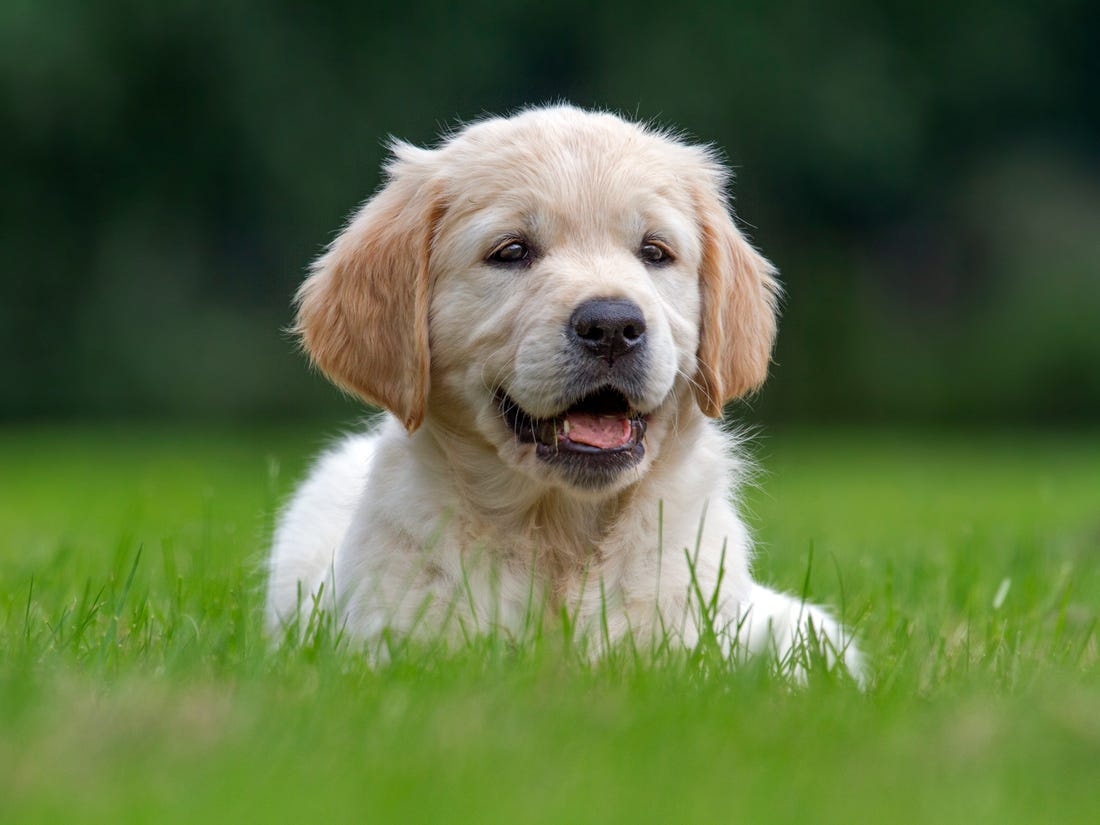

In [8]:
image_mappings['dog1.jpg']

In [9]:
def compare(a, b):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(a)
    plt.subplot(1, 2, 2)
    plt.imshow(b)
    a_v = feat_vec.get_vector(a)
    b_v = feat_vec.get_vector(b)
    print('Similarity: {}'.format(feat_vec.similarity(a_v, b_v)))

Similarity: tensor([0.7975])


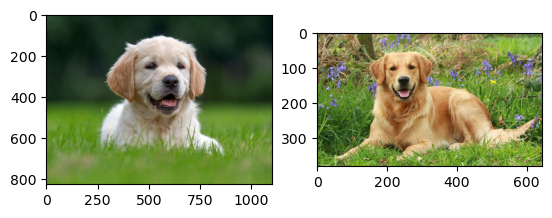

In [10]:
compare(image_mappings['dog1.jpg'], image_mappings['dog2.jpg'])

Similarity: tensor([0.5905])


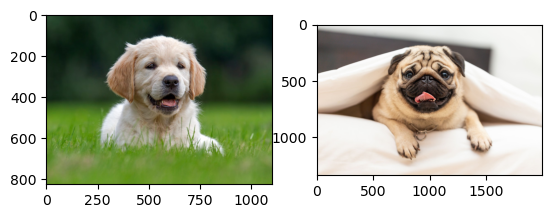

In [11]:
compare(image_mappings['dog1.jpg'], image_mappings['dog3.jpg'])

Similarity: tensor([0.4891])


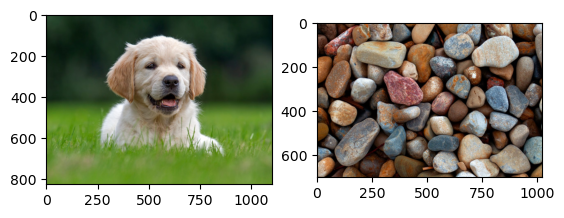

In [12]:
compare(image_mappings['dog1.jpg'], image_mappings['stones.jpg'])

Similarity: tensor([0.4682])


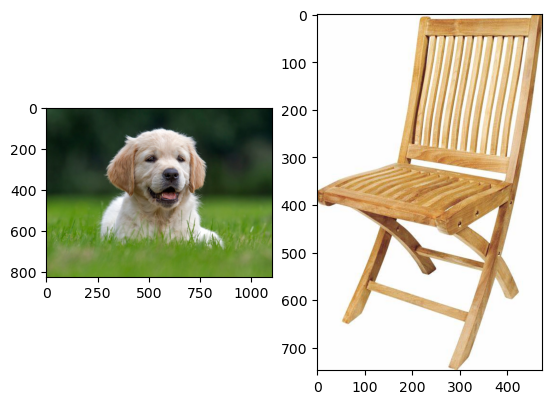

In [13]:
compare(image_mappings['dog1.jpg'], image_mappings['chair.jpg'])

Similarity: tensor([0.5276])


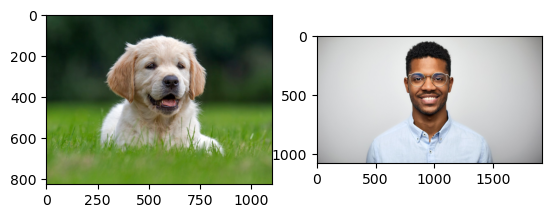

In [14]:
compare(image_mappings['dog1.jpg'], image_mappings['person2.jpg'])

Similarity: tensor([0.7823])


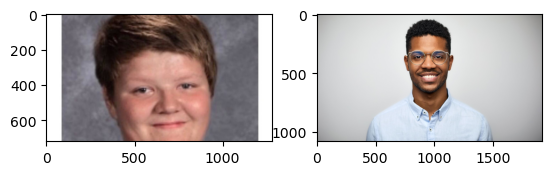

In [15]:
compare(image_mappings['person1.jpg'], image_mappings['person2.jpg'])

In [16]:
import redis

In [17]:
import redis
_HOST = "redis"
_PORT = "6379"
r = redis.Redis(
    host=_HOST,
    port=_PORT, 
    # password='password'
)

In [18]:
import pandas as pd
import numpy as np

In [19]:
# Encoding PIL images to string format
from PIL import Image
import io
import base64
from io import BytesIO

image_str_mappings = {}

for img_name, img in image_mappings.items():
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    image_str_mappings[img_name] = img_str

    
# # For decoding, use the below commented code 
# f = io.BytesIO(base64.b64decode(img_str))
# pilimage = Image.open(f)
# pilimage

In [20]:
# initialise data of lists.
data = {'name':image_mappings.keys(), 'images':image_mappings.values()}
 
# Create DataFrame
df = pd.DataFrame(data)
 
df['paths'] = df['name'].map(image_file_name_path_mapping)
df['content'] = image_str_mappings.values()

In [21]:
imgs = [v['content'] for v in df.to_dict(orient='records')]
# imgs

In [22]:
metadata = df[['name', 'paths']].to_dict(orient='records')

In [23]:
from langchain.embeddings.base import Embeddings
from typing import List
from abc import abstractmethod

class ResNetEmbeddings(Embeddings):
    """Custom embeddings class for Resnet Embeddings which can be used alongside langchain"""

    def embed_documents(self, texts: List[str]) -> List[List[float]]:
        all_vectors = []
        for img_str in texts:
            f = io.BytesIO(base64.b64decode(img_str))
            pilimage = Image.open(f)
            featvect  = feat_vec.get_vector(pilimage).tolist()
            all_vectors.append(featvect)
        return all_vectors

    def embed_query(self, text: str) -> List[float]:
        f = io.BytesIO(base64.b64decode(text))
        pilimage = Image.open(f)
        featvect  = feat_vec.get_vector(pilimage).tolist()        
        return featvect

In [24]:
 # # To Flush redis database run the commented line below
r.flushdb() # Cautu
save_vectors_flag = 0

In [25]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores.redis import Redis as RedisVectorStore

save_vectors_flag += 1

# data that will be embedded and converted to vectors
texts = imgs


# product metadata that we'll store along our vectors
metadatas = metadata

# we will use OpenAI as our embeddings provider
embedding = ResNetEmbeddings()

# name of the Redis search index to create
index_name = "images"

# assumes you have a redis stack server running on within your docker compose network
redis_url = f"redis://{_HOST}:{_PORT}"

if save_vectors_flag ==1:
    # # # Run below for calculating and storing embeddings in vector db only once
    # # # create and load redis with documents
    vectorstore = RedisVectorStore.from_texts(
        texts=texts,
        metadatas=metadatas,
        embedding=embedding,
        index_name=index_name,
        redis_url=redis_url
    )
else:
    vectorstore = RedisVectorStore.from_existing_index(
        embedding=embedding,
        index_name=index_name,
        redis_url=redis_url,
    )

In [26]:
def get_image_from_str(img_str):
    f = io.BytesIO(base64.b64decode(img_str))
    pilimage = Image.open(f)
    return pilimage

def get_similiar_images(img):
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue())
    similiar_imgs = vectorstore.similarity_search_with_score(img_str, k=11)
    images = [get_image_from_str(similiar_imgs[x][0].page_content) for x in range(len(similiar_imgs))]
    scores = [similiar_imgs[x][1] for x in range(len(similiar_imgs))]

    return images, scores


In [27]:
ref_img_for_comparison = 'dog1.jpg'
img = image_mappings[ref_img_for_comparison]
result_imgs,scores =  get_similiar_images(img)


Nearest neighbours and similarity in decreasing order
Similarity : 0.9999999403953552
Similarity : 0.791936218739
Similarity : 0.790010511875
Similarity : 0.6678805947299999
Similarity : 0.58857524395
Similarity : 0.541033685207
Similarity : 0.531253874302
Similarity : 0.525436639786
Similarity : 0.524337828159
Similarity : 0.49199295043900004
Similarity : 0.465123772621


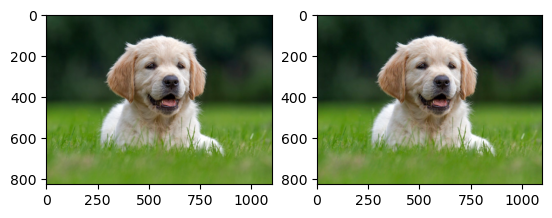

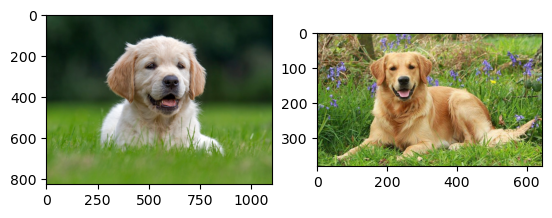

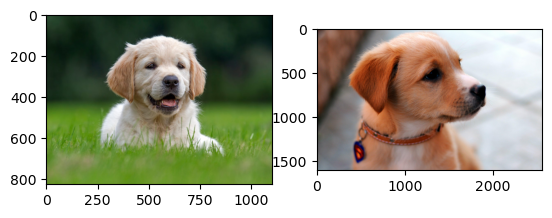

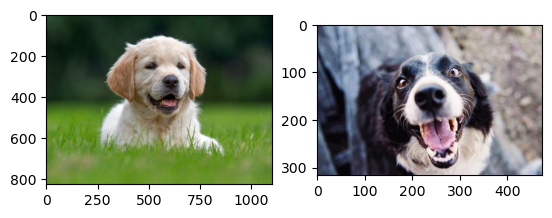

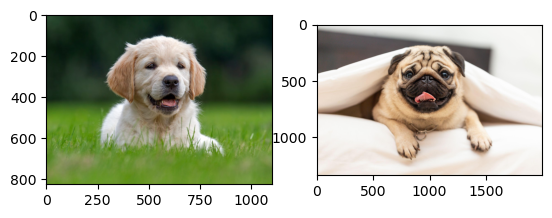

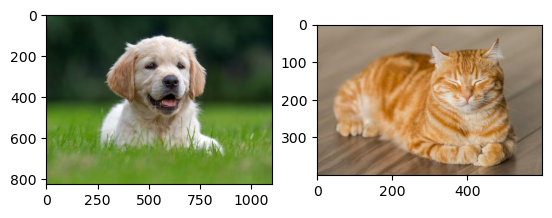

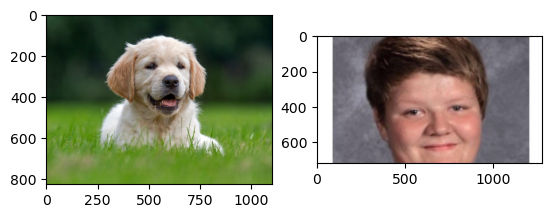

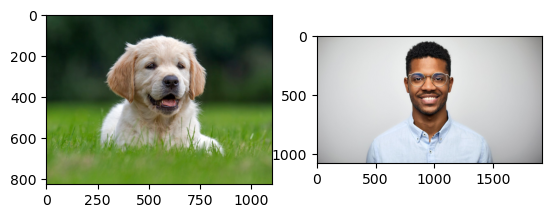

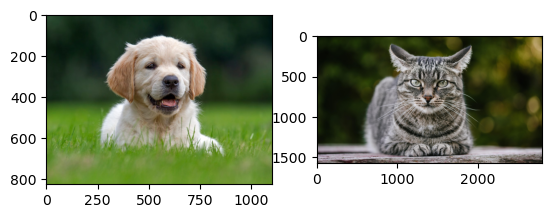

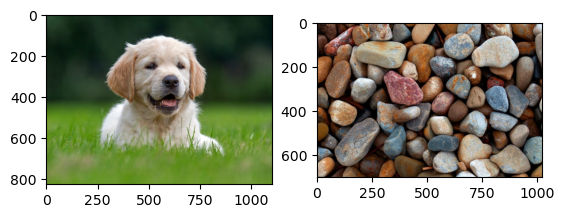

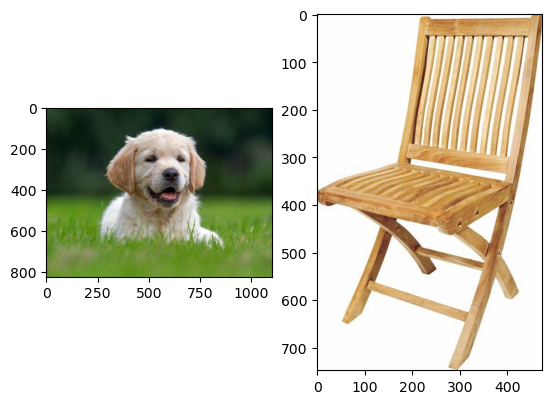

In [28]:
print("Nearest neighbours and similarity in decreasing order")

for neighbour_ind in range(len(result_imgs)):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(image_mappings[ref_img_for_comparison])
    plt.subplot(1, 2, 2)
    plt.imshow(result_imgs[neighbour_ind])
    print('Similarity : {}'.format(1- scores[neighbour_ind]))

Now , lets check the same for an unknown image which we didnt yet read so far and try to find its similarity

Top 5 neighbours and similarity in decreasing order
Similarity : 0.63353061676
Similarity : 0.552430808544
Similarity : 0.5155676603320001
Similarity : 0.49219191074400004
Similarity : 0.48717212677


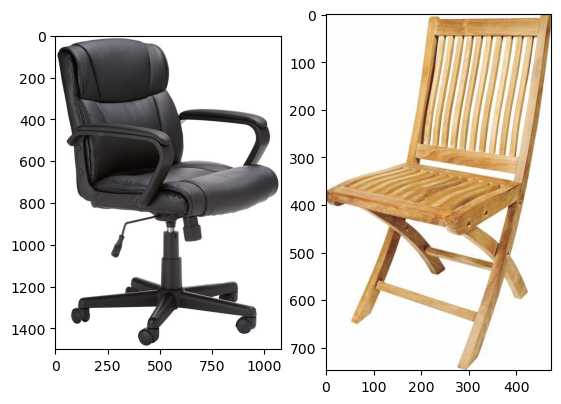

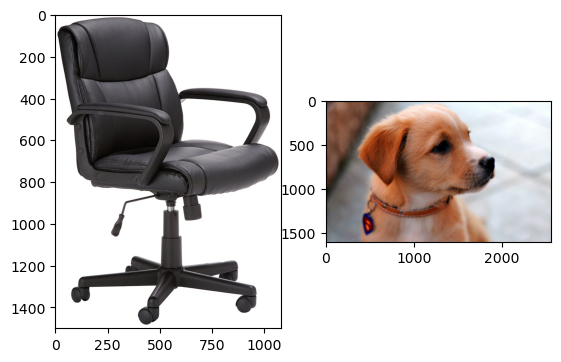

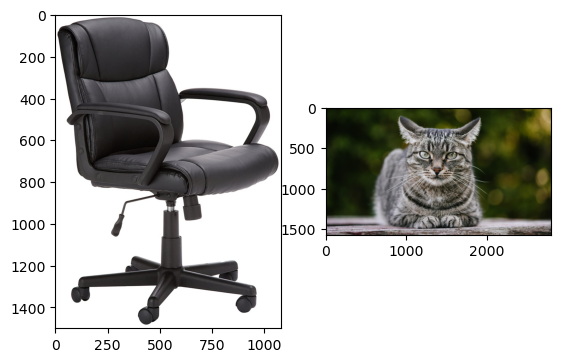

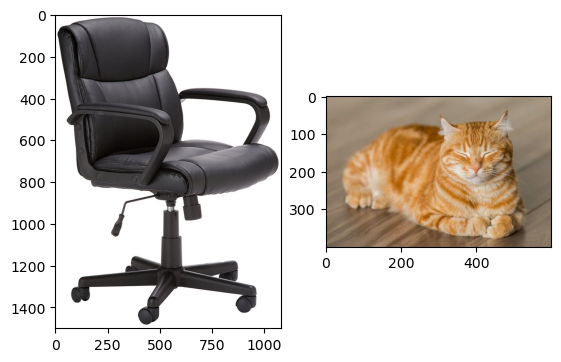

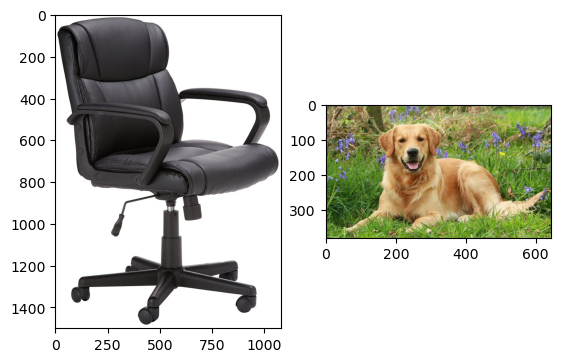

In [29]:
unk_img_paths= ["./test_img/unk1.jpg", "./test_img/unk2.jpg"]
unk_img_maps = {x.split("/")[-1]:Image.open(x) for x in unk_img_paths}
unk_img = unk_img_maps['unk2.jpg']
result_imgs_unk,scores_unk =  get_similiar_images(unk_img)
print("Top 5 neighbours and similarity in decreasing order")

for neighbour_ind in range(len(result_imgs_unk)-6):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(unk_img)
    plt.subplot(1, 2, 2)
    plt.imshow(result_imgs_unk[neighbour_ind])
    print('Similarity : {}'.format(1- scores_unk[neighbour_ind]))

We can see the vector similarity works here and is able to return the most similiar pic of chair in top result